# Implement scripts and functions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from sklearn.linear_model import Lasso, LinearRegression, Ridge

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore")
#warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
%reload_ext autoreload

## Read in file, clean functions and perform rolling means

In [3]:
import preprocessor, league_table, soccer_model, home_away
import rolling_means as rmeans
import soccer_linear_model as footy_lin_mod
import Team_Dominancy as team_dom

In [4]:
csvfile = '../data/FootballEurope/FootballEurope.csv' 
roll_df = rmeans.final_df_rolling_means(csvfile)  

In [5]:
roll_df.head()

AerialsTotalFT  CornersTotalFT  \
days_after_opener game_id Team                                        
0 days            232     Reading               NaN             NaN   
                          Stoke                 NaN             NaN   
                  292     QPR                   NaN             NaN   
                          Swansea               NaN             NaN   
                  293     Liverpool             NaN             NaN   

                                     DispossessedFT  DribbleSuccessFT  \
days_after_opener game_id Team                                          
0 days            232     Reading               NaN               NaN   
                          Stoke                 NaN               NaN   
                  292     QPR                   NaN               NaN   
                          Swansea               NaN               NaN   
                  293     Liverpool             NaN               NaN   

                                     DribbledPastFT  DribblesAttemptedFT  \
days_after_opener game_id Team                                             
0 days            232     Reading               NaN                  NaN   
                          Stoke                 NaN                  NaN   
                  292     QPR                   NaN                  NaN   
                          Swansea               NaN                  NaN   
                  293     Liverpool             NaN                  NaN   

                                     DribblesWonFT  FormationCode  \
days_after_opener game_id Team                                      
0 days            232     Reading              NaN            NaN   
                          Stoke                NaN            NaN   
                  292     QPR                  NaN            NaN   
                          Swansea              NaN            NaN   
                  293     Liverpool            NaN            NaN   

                                     FoulsCommitedFT  InterceptionsFT  \
days_after_opener game_id Team                                          
0 days            232     Reading                NaN              NaN   
                          Stoke                  NaN              NaN   
                  292     QPR                    NaN              NaN   
                          Swansea                NaN              NaN   
                  293     Liverpool              NaN              NaN   

                                     OffsidesCaughtFT  PassSuccessFT  \
days_after_opener game_id Team                                         
0 days            232     Reading                 NaN            NaN   
                          Stoke                   NaN            NaN   
                  292     QPR                     NaN            NaN   
                          Swansea                 NaN            NaN   
                  293     Liverpool               NaN            NaN   

                                     PassesKeyFT  PossessionFT  RatingsFT  \
days_after_opener game_id Team                                              
0 days            232     Reading            NaN           NaN        NaN   
                          Stoke              NaN           NaN        NaN   
                  292     QPR                NaN           NaN        NaN   
                          Swansea            NaN           NaN        NaN   
                  293     Liverpool          NaN           NaN        NaN   

                                     ShotsBlockedFT  ShotsOnTargetFT  \
days_after_opener game_id Team                                         
0 days            232     Reading               NaN              NaN   
                          Stoke                 NaN              NaN   
                  292     QPR                   NaN              NaN   
                          Swansea               NaN              NaN   
                  293

## Linear Model

In [6]:
%run soccer_linear_model.py

Enter path to file that you wish to pre-process: (should be a .csv file) -->../data/FootballEurope/FootballEurope.csv../data/FootballEurope/FootballEurope.csv

Model:Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0002, warm_start=False)
R-squared:0.107
Mean Abs Error:0.109
RMSE:0.137

Model:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
R-squared:0.282
Mean Abs Error:0.097
RMSE:0.123

Model:Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R-squared:0.282
Mean Abs Error:0.097
RMSE:0.123


In [7]:
model_df = footy_lin_mod.get_model_df(csvfile)

In [8]:
model_df.head()

,Home_AerialsTotalFT,Home_CornersTotalFT,Home_DispossessedFT,Home_DribbleSuccessFT,Home_DribbledPastFT,Home_DribblesAttemptedFT,Home_DribblesWonFT,Home_FormationCode,Home_FoulsCommitedFT,Home_InterceptionsFT,Home_OffsidesCaughtFT,Home_PassSuccessFT,Home_PassesKeyFT,Home_PossessionFT,Home_ShotsBlockedFT,Home_ShotsOnTargetFT,Home_ShotsTotalFT,Home_TackleSuccessFT,Home_TacklesTotalFT,Home_Total_GoalsFT,Home_GoalFT,Away_AerialsTotalFT,Away_CornersTotalFT,Away_DispossessedFT,Away_DribbleSuccessFT,Away_DribbledPastFT,Away_DribblesAttemptedFT,Away_DribblesWonFT,Away_FormationCode,Away_FoulsCommitedFT,Away_InterceptionsFT,Away_OffsidesCaughtFT,Away_PassSuccessFT,Away_PassesKeyFT,Away_PossessionFT,Away_ShotsBlockedFT,Away_ShotsOnTargetFT,Away_ShotsTotalFT,Away_TackleSuccessFT,Away_TacklesTotalFT,Away_GoalFT
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
251,34.0,6.4,16.6,48.258,5.2,26.0,13.4,2.0,8.0,19.6,1.0,77.688,13.0,57.840,4.8,4.6,17.0,83.954,29.2,2.2,1.0,28.2,4.2,12.8,47.598,5.0,15.6,7.6,2.0,12.8,16.2,1.2,73.138,11.8,53.560,3.8,4.8,15.2,78.808,22.4,2.0
252,33.0,4.8,11.4,50.396,6.0,9.8,5.0,3.0,13.6,11.6,2.0,71.194,15.4,51.582,5.6,6.4,20.2,76.824,22.4,2.8,3.0,23.0,4.2,12.8,31.666,5.4,12.0,4.2,1.0,7.8,20.0,1.6,72.844,9.8,48.940,3.0,4.2,13.4,82.596,27.6,1.0
253,23.4,6.4,13.2,47.008,4.6,13.6,6.6,2.4,8.8,18.0,1.4,76.394,11.0,49.962,4.4,8.2,16.2,77.448,20.4,3.8,1.0,29.0,6.6,16.0,53.422,5.6,13.6,7.4,2.2,9.6,12.0,1.6,75.128,11.2,53.994,5.2,6.4,16.4,85.138,30.0,2.0
254,25.2,6.2,16.0,43.980,7.2,19.6,9.4,1.2,12.0,11.6,1.6,76.554,12.4,55.010,4.4,4.2,17.8,74.902,28.8,2.8,5.0,46.0,4.8,10.8,51.722,7.6,8.8,4.6,2.6,14.4,9.0,1.4,60.628,10.4,47.062,3.2,4.2,14.2,70.432,24.6,2.0
257,46.6,2.6,11.2,28.630,7.8,9.8,2.8,3.0,13.8,14.8,2.8,58.466,8.0,40.936,3.2,3.2,10.6,77.312,29.2,1.8,2.0,30.4,5.6,12.6,29.500,5.2,13.8,5.0,0.8,14.0,12.0,1.4,77.166,9.8,53.004,3.8,5.0,13.8,80.828,24.2,0.0


In [9]:
lassoL1 = Lasso(alpha=0.005, tol=.0002)
LassoPred = footy_lin_mod.linear_model(model_df, lassoL1, 0.25)

Model:Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0002, warm_start=False)
R-squared:0.281
Mean Abs Error:0.407
RMSE:0.517


In [10]:
linreg = LinearRegression()
LinRegPred = footy_lin_mod.linear_model(model_df, linreg, 0.25)

Model:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
R-squared:0.282
Mean Abs Error:0.408
RMSE:0.517


In [11]:
ridgeL2 = Ridge(alpha=0.005)
RidgePred = footy_lin_mod.linear_model(model_df, ridgeL2, 0.25)

Model:Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R-squared:0.282
Mean Abs Error:0.408
RMSE:0.517


In [12]:
lassoL1.coef_[[11,15]] #model_df.columns[[11,15]] ---> ['Home_PassSuccessFT', 'Home_ShotsOnTargetFT']

array([0.00837634, 0.19023431])

In [13]:
ridgeL2.coef_

array([-0.00669043, -0.0279201 , -0.00020469,  0.00998436,  0.09025298,
        0.02519743, -0.03766835,  0.0518481 , -0.03657547, -0.00431456,
       -0.06593521,  0.00826604, -0.02008784, -0.01112819, -0.07198325,
        0.20309436,  0.01227999,  0.02529653, -0.0238568 ,  0.00045022,
       -0.0053961 ,  0.00152663,  0.0094974 , -0.00548523,  0.01692727,
       -0.01246795, -0.000669  ,  0.05258558, -0.00725124, -0.00264186,
       -0.00406856,  0.00284861,  0.00212513,  0.00532809,  0.00325385,
        0.01374528, -0.0119368 ,  0.00455003, -0.0051835 ,  0.02106496])

In [14]:
minmaxLassoPred = footy_lin_mod.linear_model(model_df, lassoL1, 0.25, 'MinMax')

Model:Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0002, warm_start=False)
R-squared:0.107
Mean Abs Error:0.109
RMSE:0.137


In [15]:
minmaxLinRegPred = footy_lin_mod.linear_model(model_df, linreg, 0.25, 'MinMax')

Model:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
R-squared:0.282
Mean Abs Error:0.097
RMSE:0.123


In [16]:
minmaxRidgePred = footy_lin_mod.linear_model(model_df, ridgeL2, 0.25, 'MinMax')

Model:Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R-squared:0.282
Mean Abs Error:0.097
RMSE:0.123


In [17]:
def realVSpred(model_pred, model_pred_str):
    for pred, pred_str in zip(model_pred, model_pred_str):
        plt.figure(figsize=(15,8))
        plt.scatter(pred[4]['actual'],pred[4]['predictions'])
        plt.xlabel('Real')
        plt.ylabel('Predictions')
        plt.title('Real Score vs Predicted Score - {} Model'.format(pred_str),size=40)
        plt.show()

In [18]:
regressorspred = [LassoPred, RidgePred, LinRegPred,
                 minmaxLassoPred, minmaxRidgePred, minmaxLinRegPred]
regressorspred_str = ['Lasso', 'Ridge', 'LinReg',
                 'minmaxLasso', 'minmaxRidge', 'minmaxLinReg']

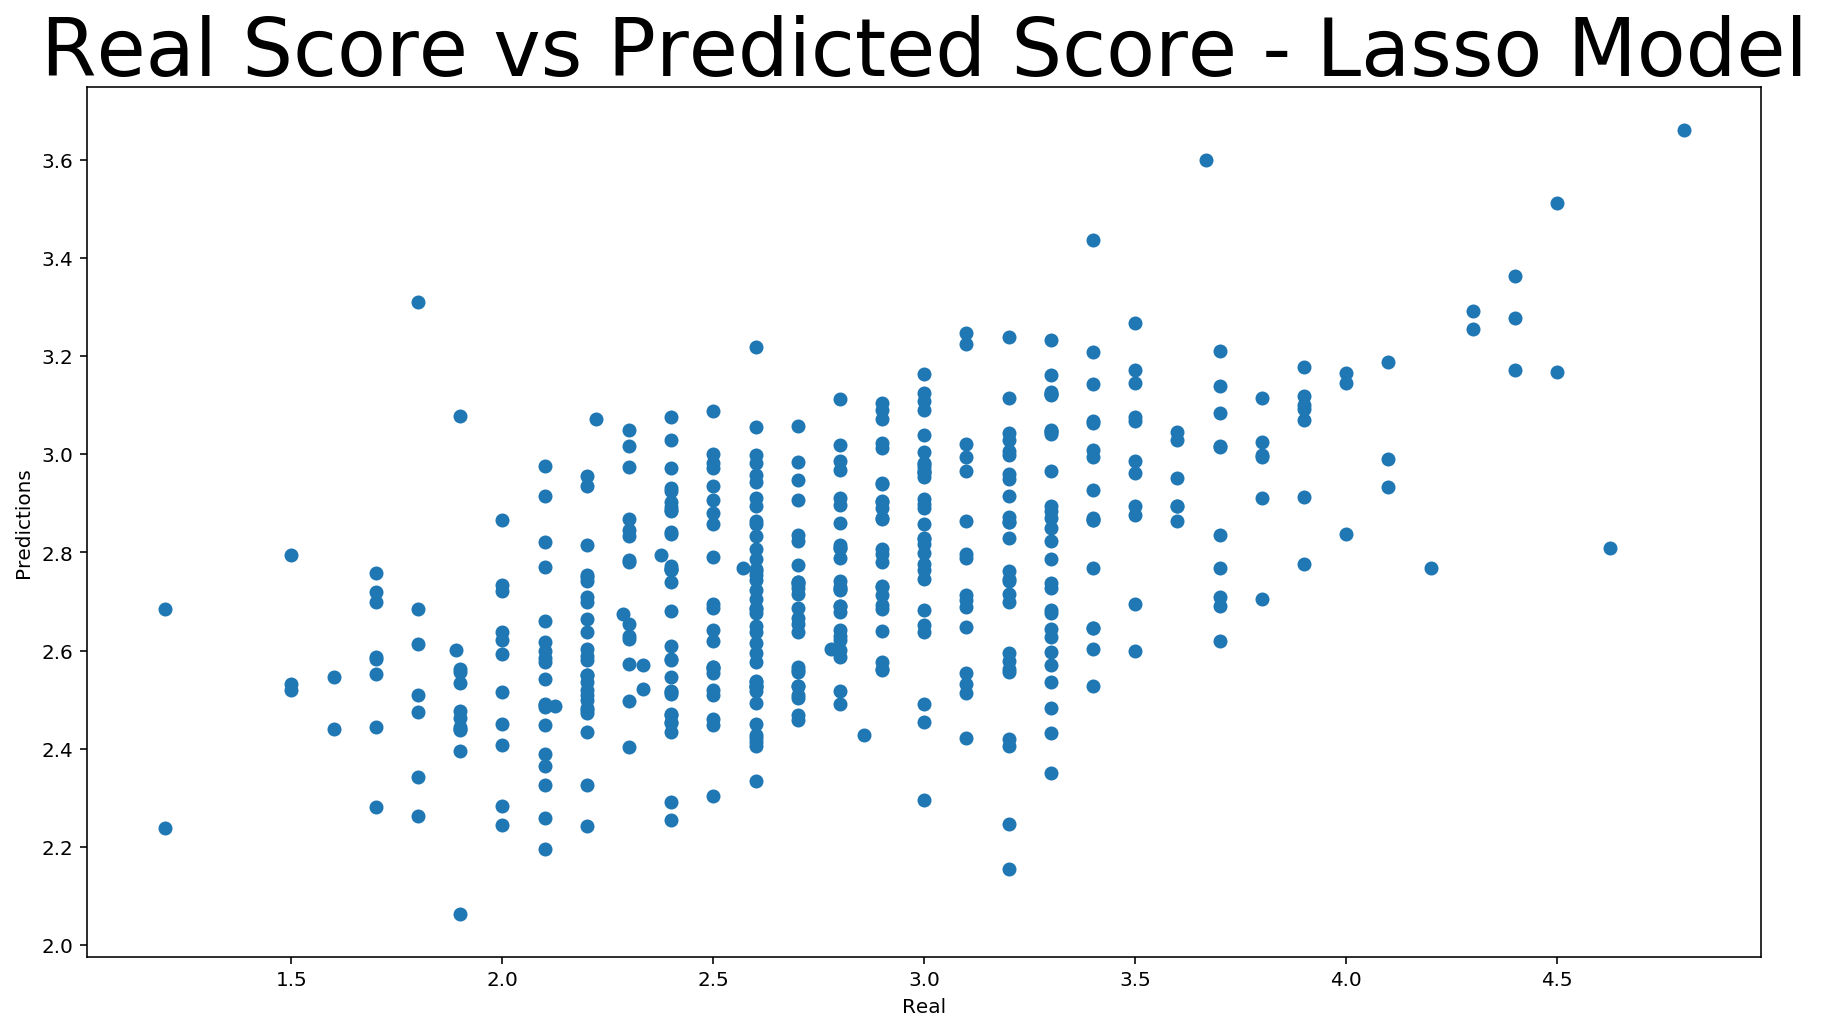

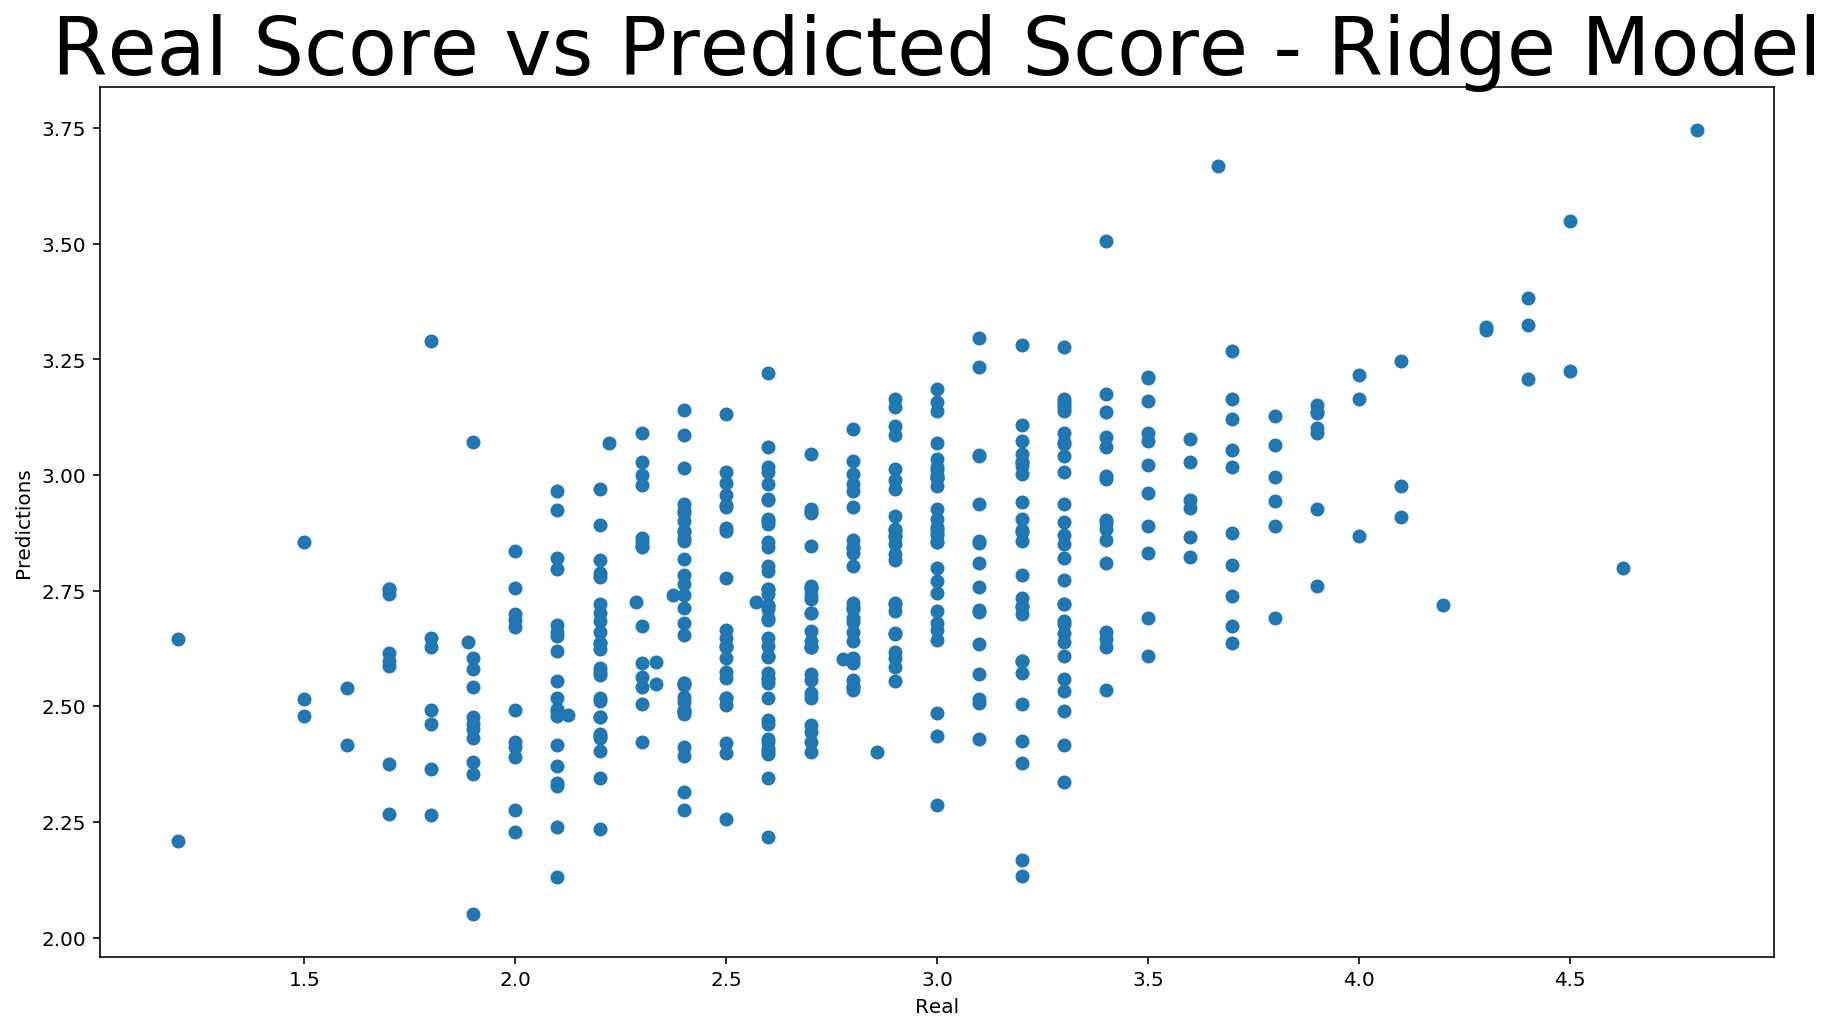

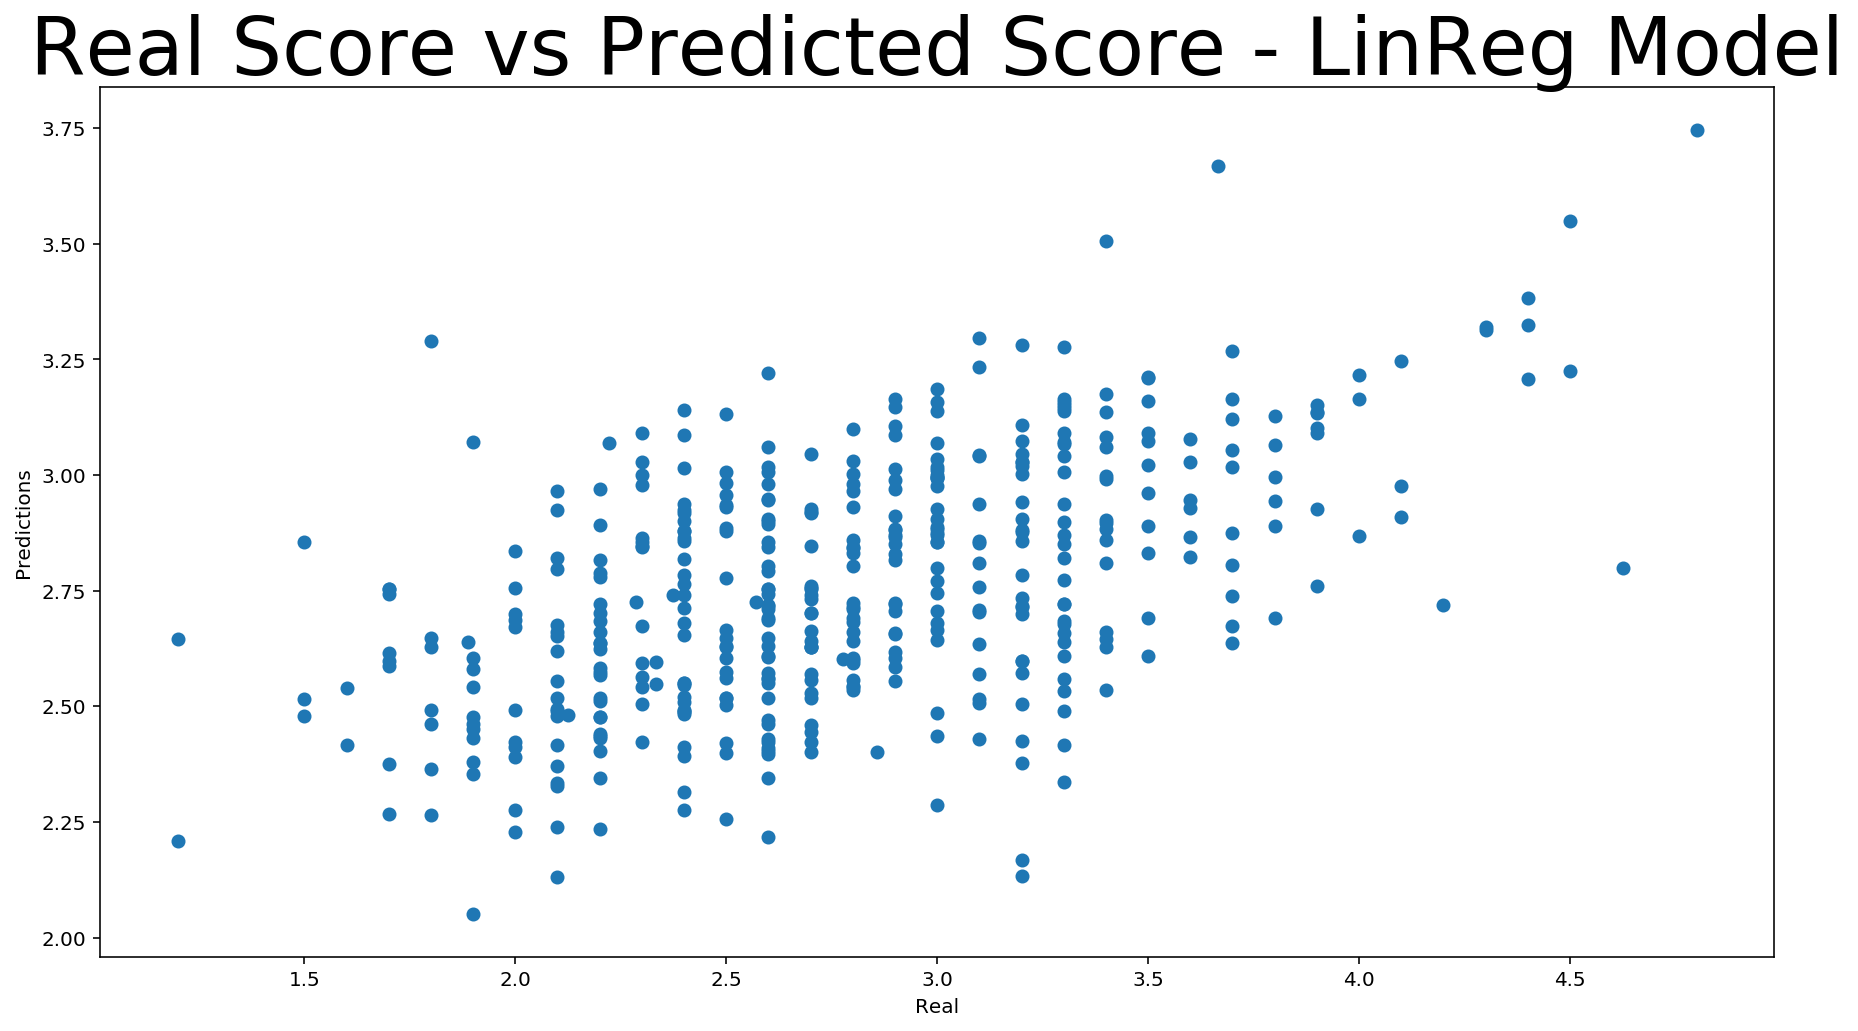

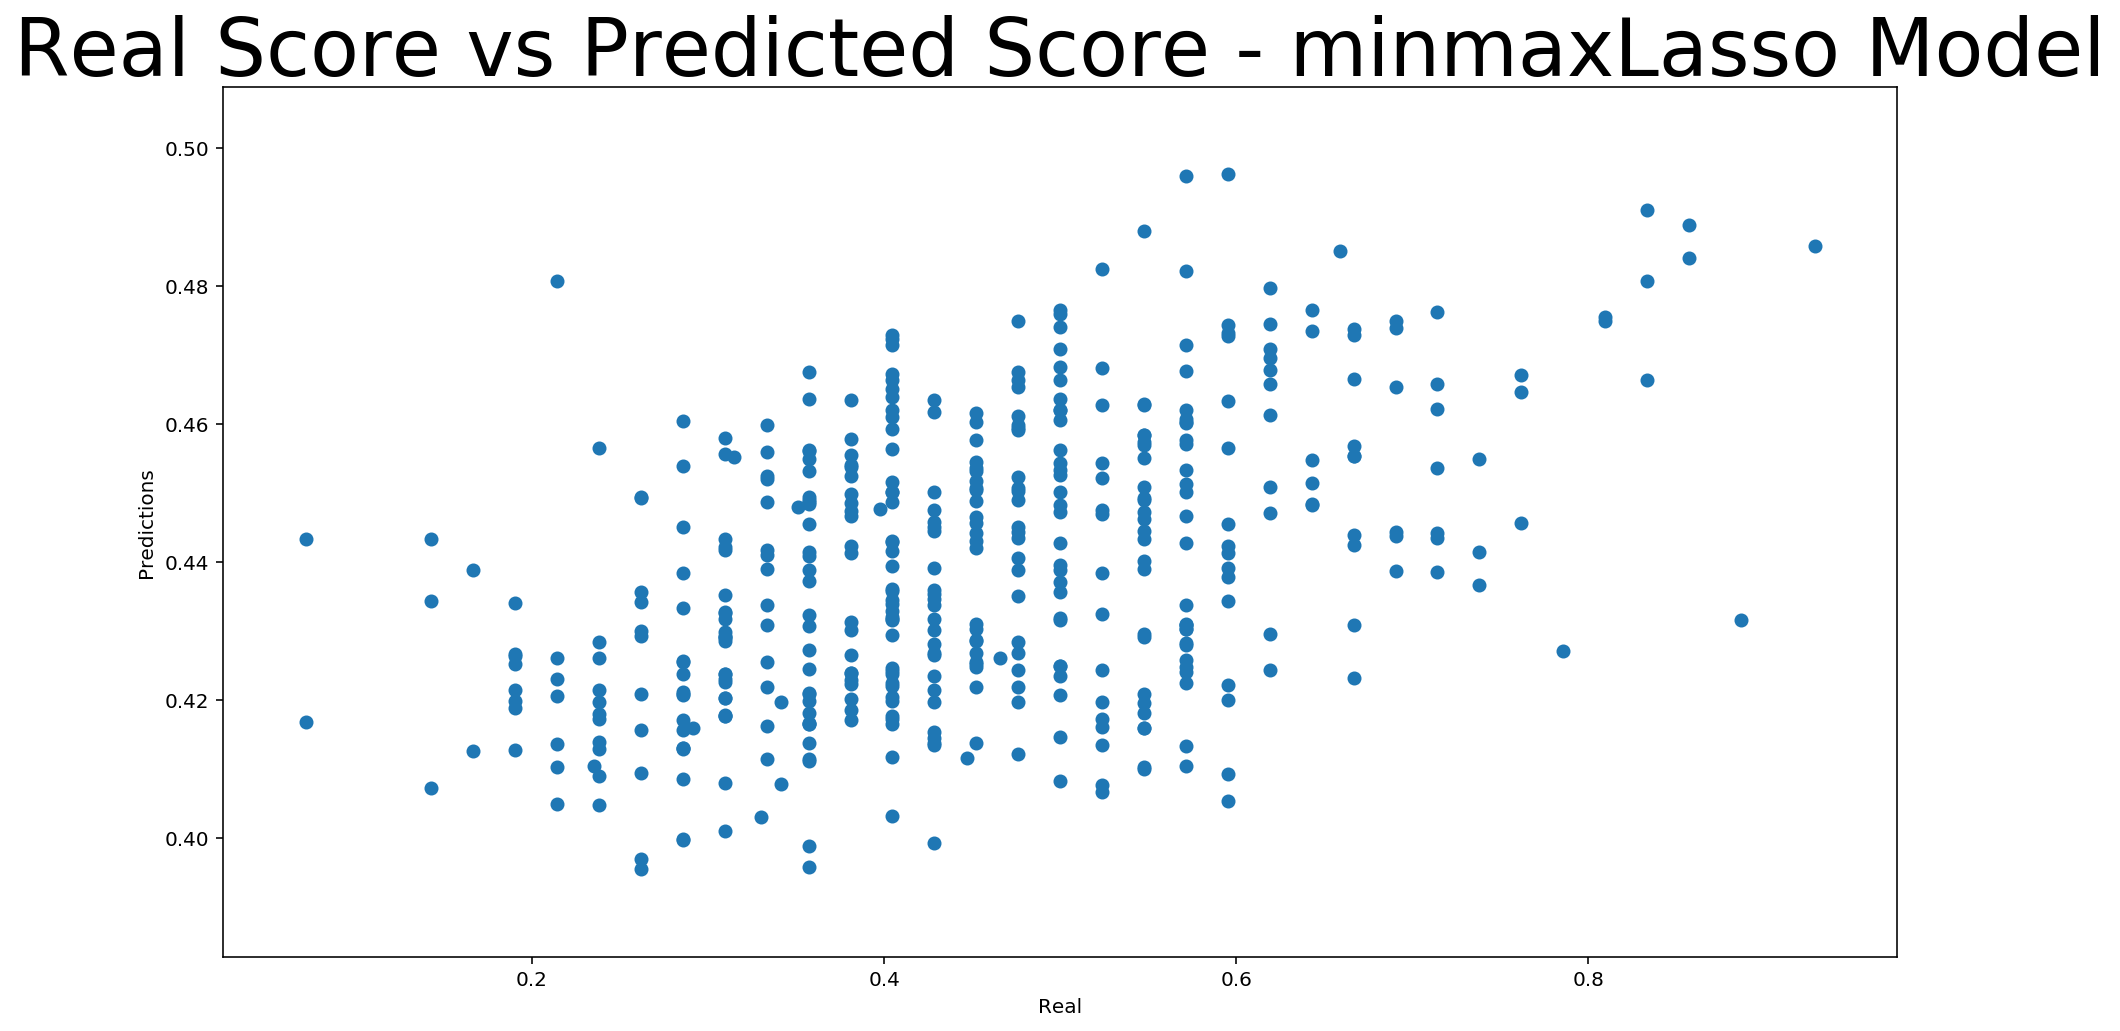

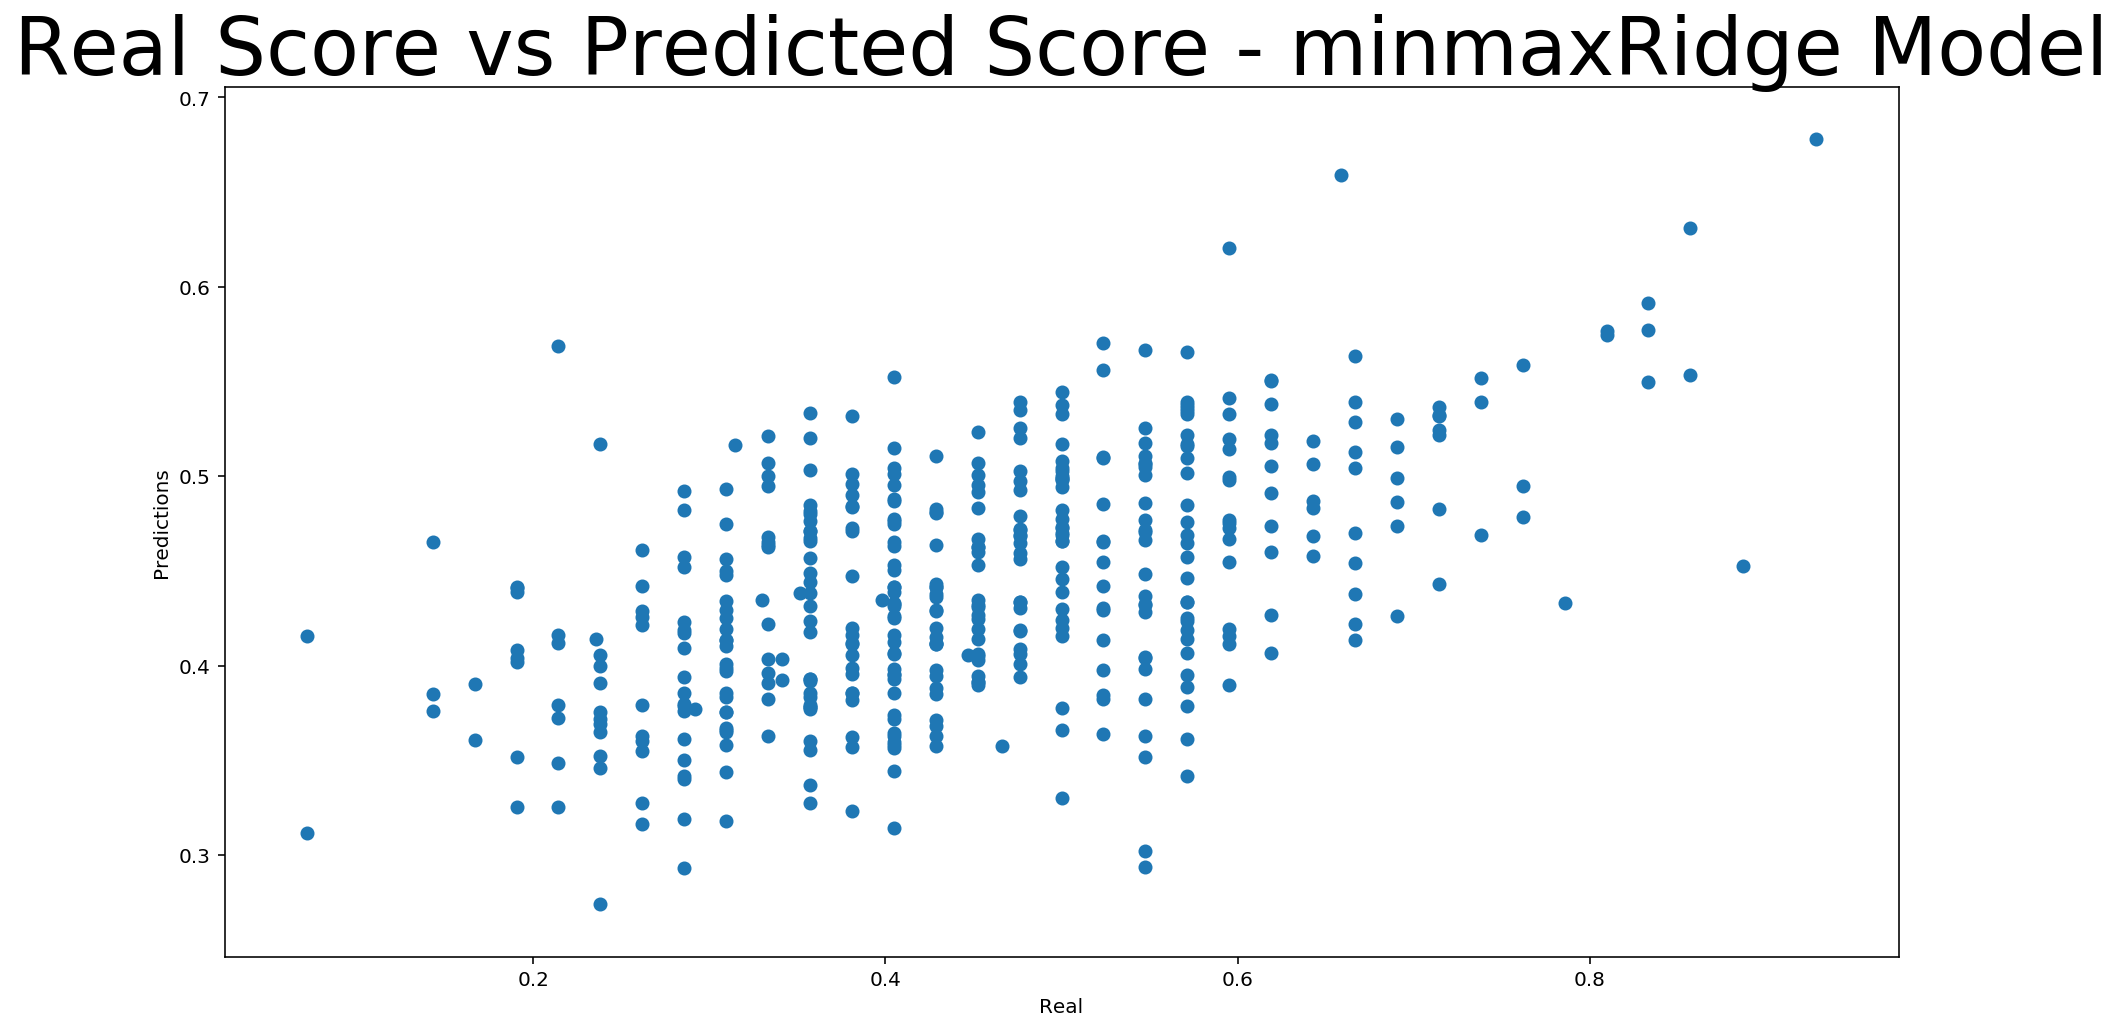

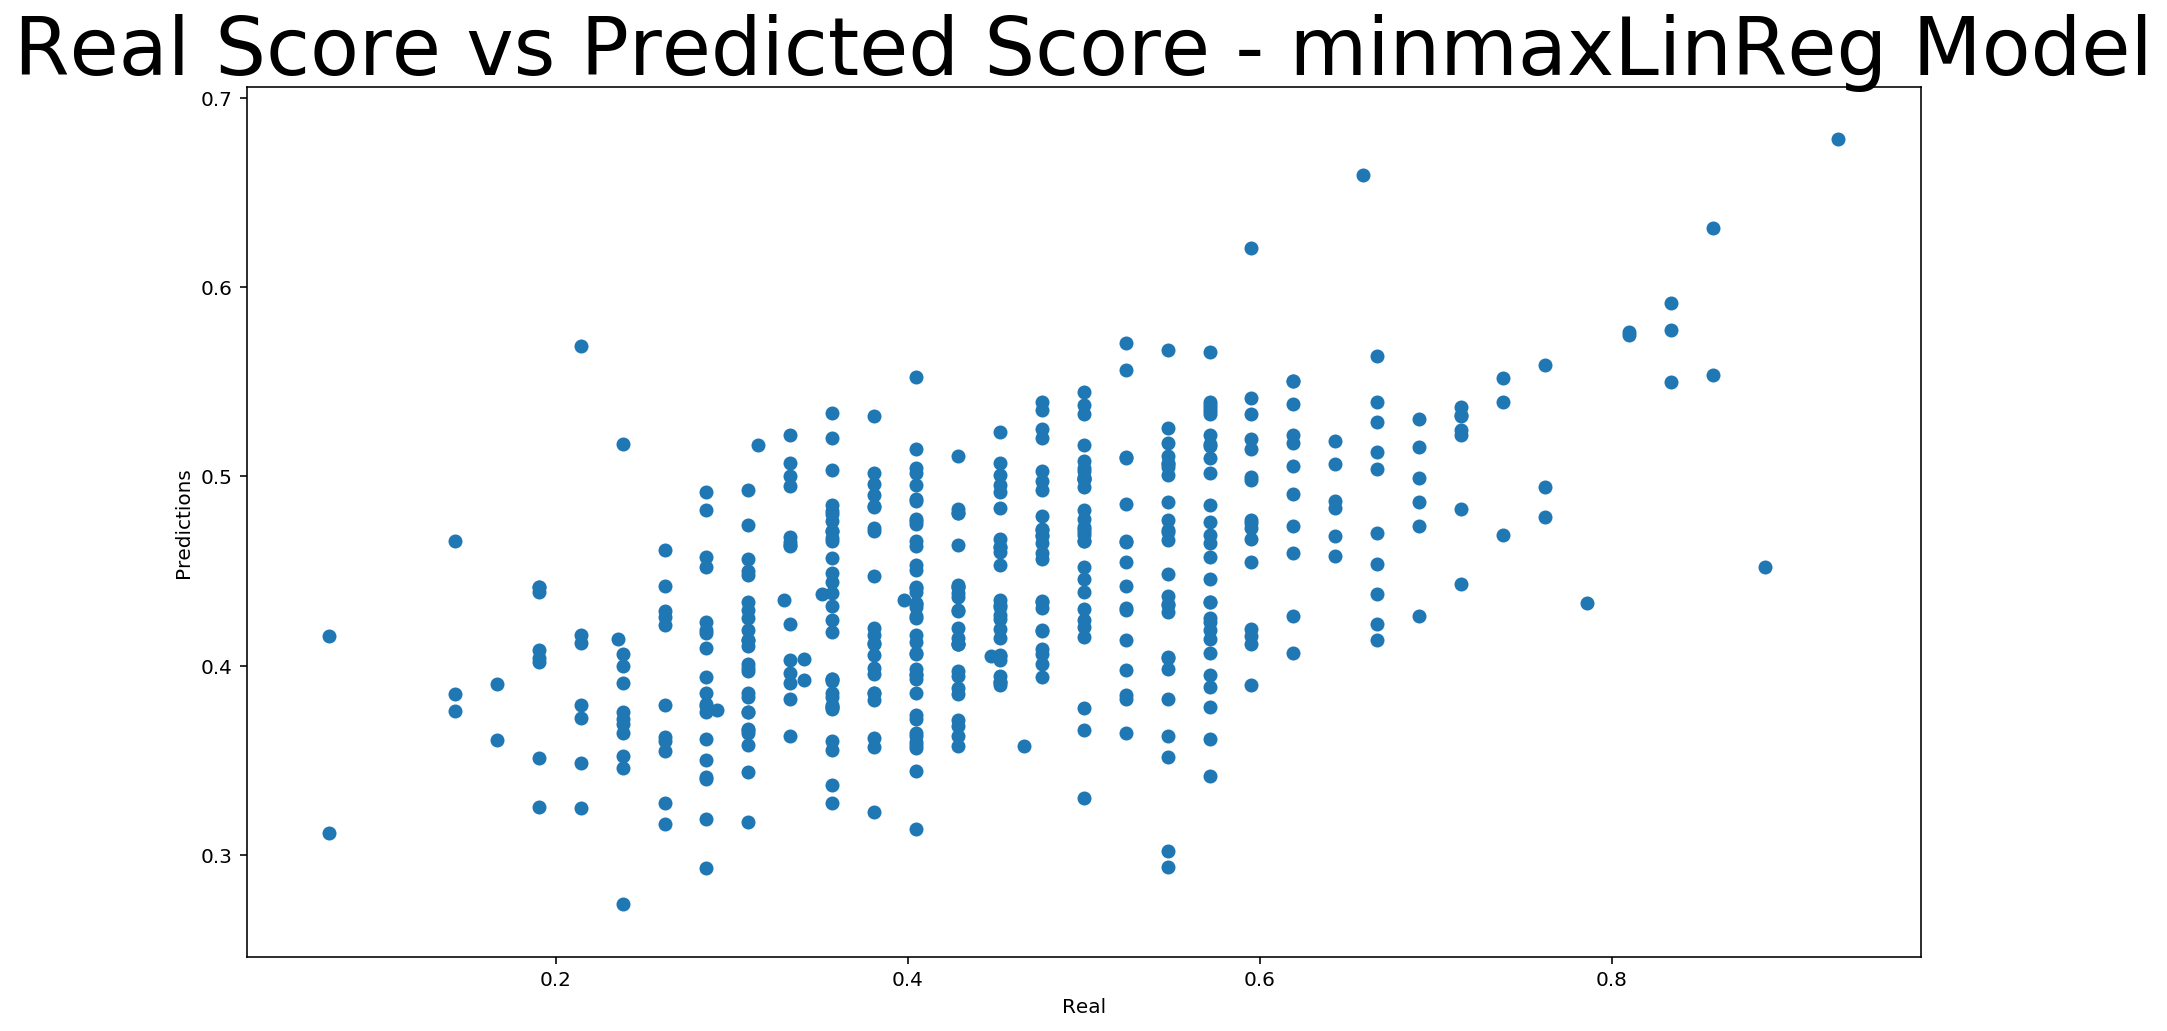

In [19]:
realVSpred(regressorspred, regressorspred_str)

# Team Dominancy

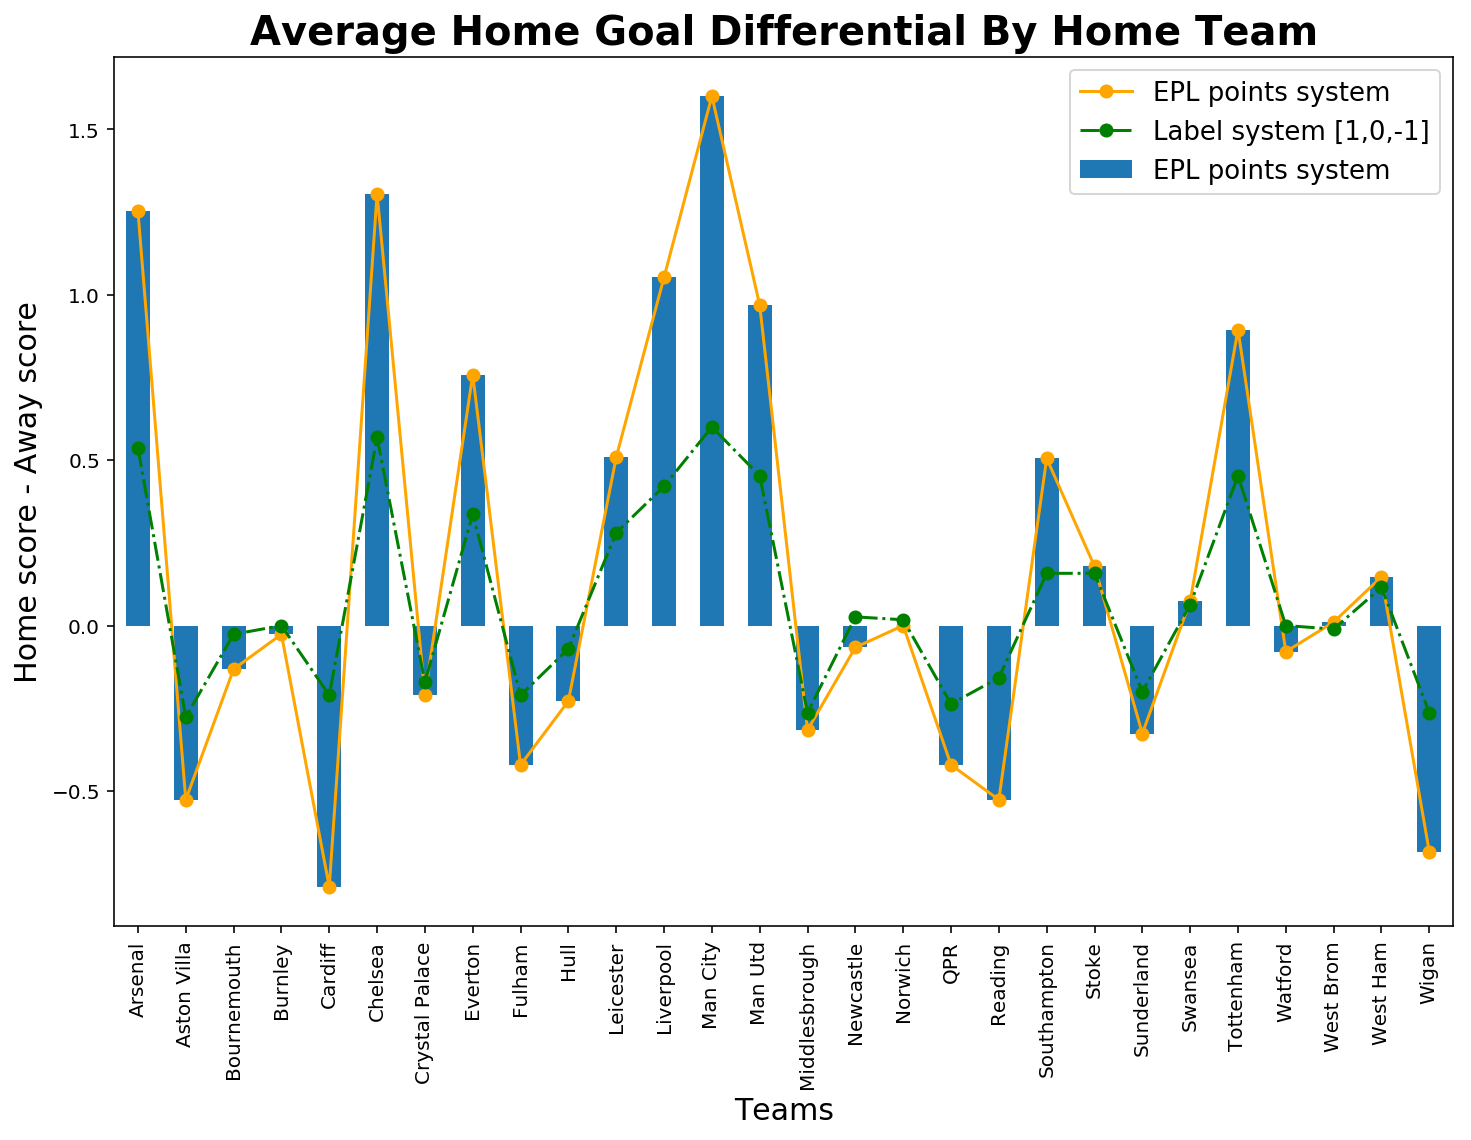

In [20]:
team_dom.dominancy_at_home(csvfile)

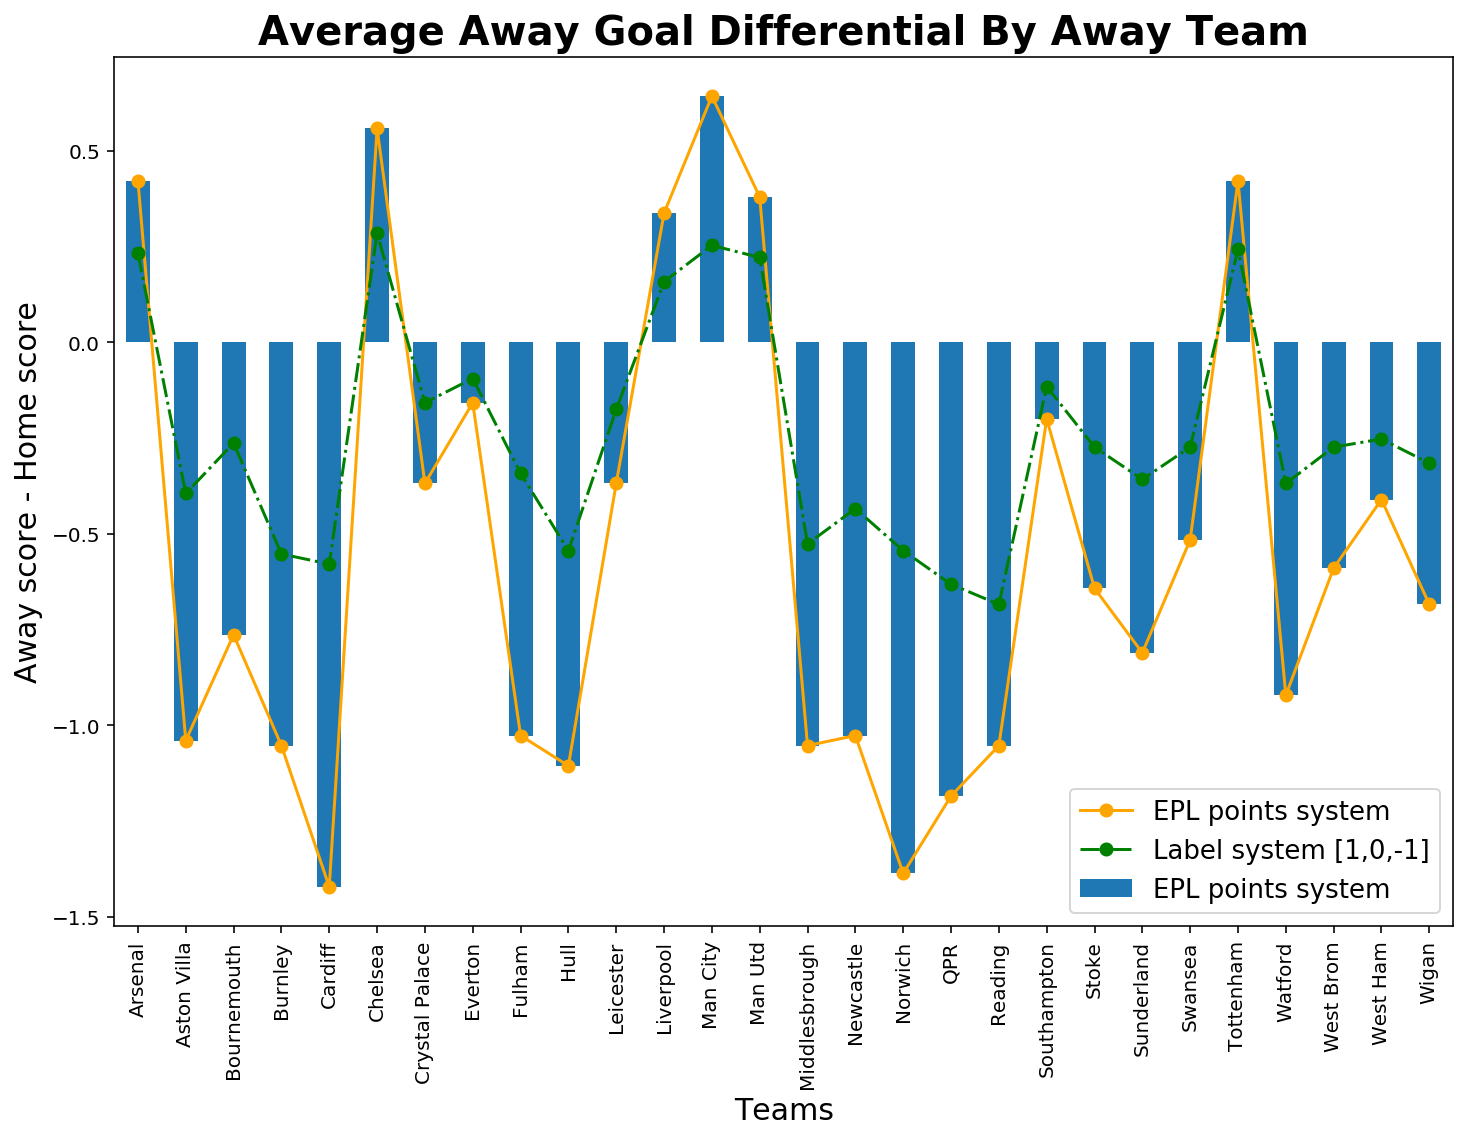

In [21]:
team_dom.dominancy_when_away(csvfile)

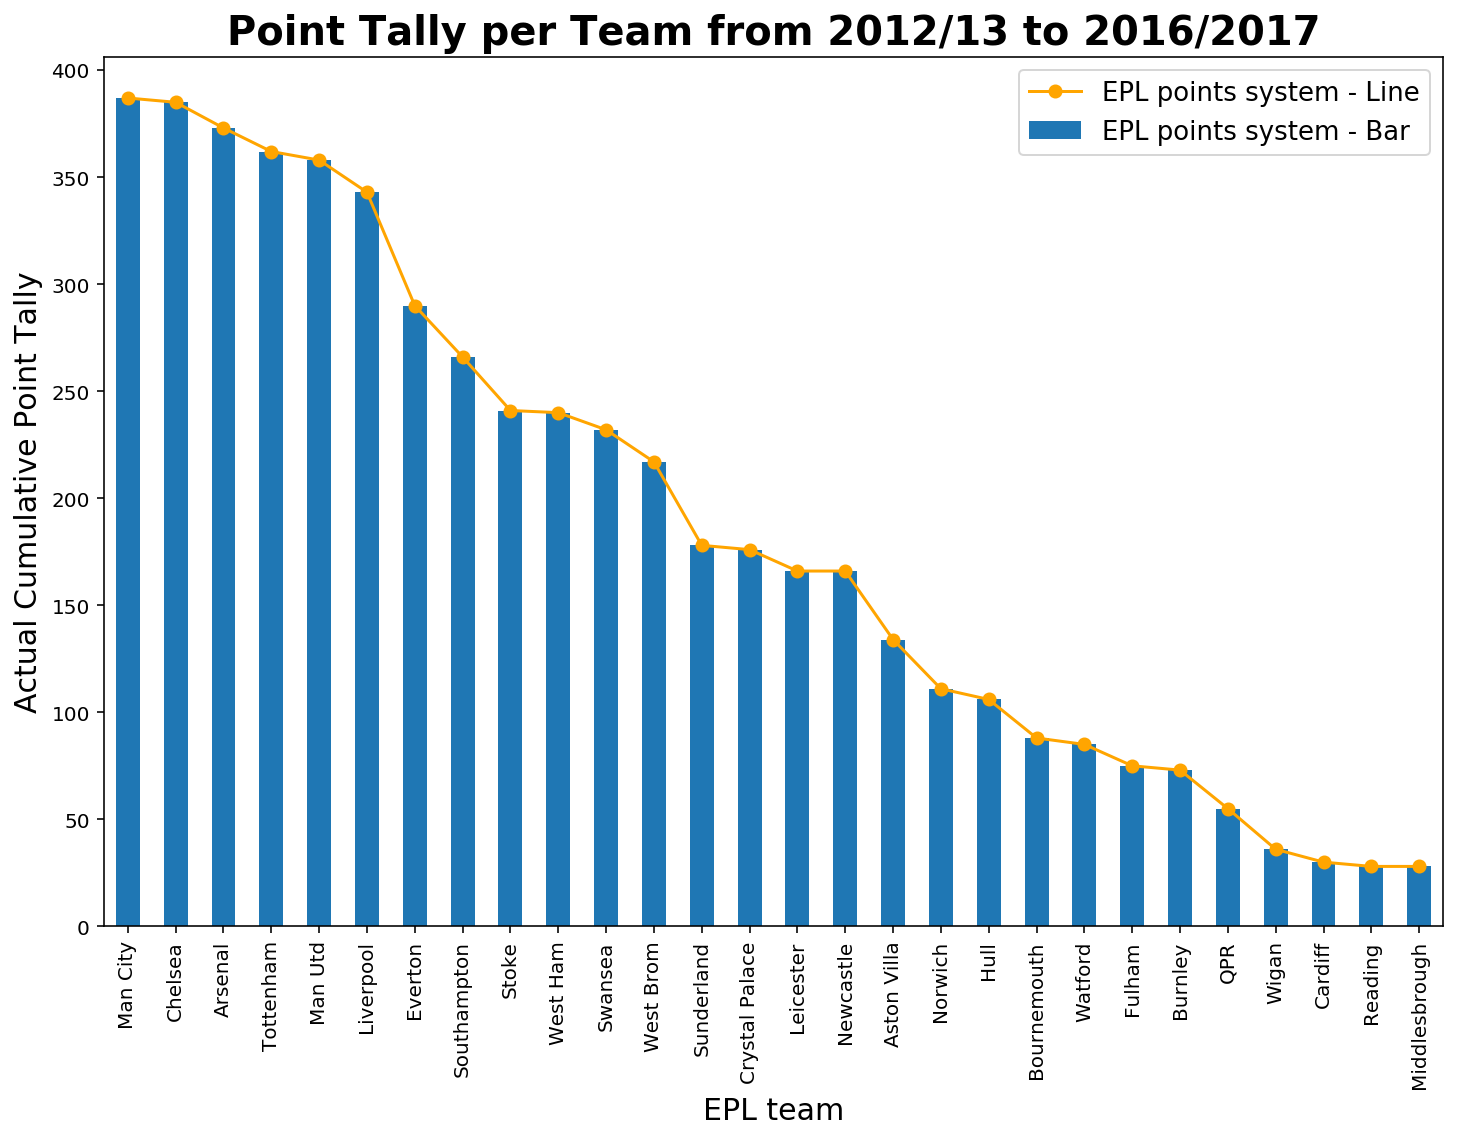

In [22]:
league_table.plot_league_table(csvfile)

# Clustering

In [23]:
%reload_ext autoreload
import clustering as clu

### n_clusters = 20 (non-normalized)

In [24]:
kmeans20_trend_df = clu.trend(csvfile) 
kmeans20_trend_df_percentiles = clu.percentiles_clusters(kmeans20_trend_df)
kmeans20_trend_df_high = clu.high_percentiles(kmeans20_trend_df)
kmeans20_trend_df_low = clu.low_percentiles(kmeans20_trend_df)
kmeans20_trend_df_medium = clu.medium_percentiles(kmeans20_trend_df)

In [25]:
kmeans20_trend_df_high

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
AerialsTotalFT,High,-,-,High,-,-,-,High,-,-,-,-,-,V. High,-,-,V. High,High,-,High
CornersTotalFT,High,-,High,-,-,High,-,-,-,-,High,-,-,-,-,High,-,-,-,High
DispossessedFT,-,-,-,-,-,-,-,-,High,-,-,-,High,-,-,-,-,-,-,-
DribbleSuccessFT,-,-,-,V. High,-,High,-,High,V. High,V. High,High,-,-,-,High,-,-,-,-,-
DribbledPastFT,-,High,-,-,-,-,High,High,-,High,-,-,High,-,High,High,-,-,-,-
DribblesAttemptedFT,High,-,High,-,-,High,-,-,-,-,High,-,High,-,-,High,-,-,-,High
DribblesWonFT,-,-,-,-,-,High,-,-,High,High,High,-,High,-,-,High,-,-,-,-
Formation,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
FoulsCommitedFT,-,-,-,-,-,-,High,High,-,-,-,-,-,-,-,-,-,-,-,-
InterceptionsFT,-,-,-,-,-,-,High,-,-,-,-,-,High,-,-,-,-,-,-,-


### n_clusters = 20 (normalized: MinMax)

In [26]:
norm_kmeans20_trend_df = clu.trend(csvfile,20,True) 
norm_kmeans20_trend_df_percentiles = clu.percentiles_clusters(norm_kmeans20_trend_df)
norm_kmeans20_trend_df_high = clu.high_percentiles(norm_kmeans20_trend_df)
norm_kmeans20_trend_df_low = clu.low_percentiles(norm_kmeans20_trend_df)
norm_kmeans20_trend_df_medium = clu.medium_percentiles(norm_kmeans20_trend_df)

In [27]:
norm_kmeans20_trend_df_high

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
AerialsTotalFT,-,High,-,-,High,-,-,-,-,-,-,High,-,-,-,-,-,-,High,-
CornersTotalFT,-,-,High,-,-,-,-,V. High,-,V. High,High,-,-,-,High,-,High,-,-,-
DispossessedFT,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,High,-,High
DribbleSuccessFT,-,-,-,-,-,-,-,High,-,-,High,-,High,High,High,High,-,-,-,High
DribbledPastFT,High,-,-,-,-,-,-,-,High,-,-,High,-,-,-,High,-,High,High,High
DribblesAttemptedFT,-,-,High,-,-,-,-,-,-,High,High,-,-,-,High,-,V. High,High,-,High
DribblesWonFT,-,-,High,-,-,-,-,High,-,High,High,-,-,-,High,-,High,High,-,High
Formation,High,-,-,High,High,-,High,High,-,High,-,High,High,High,-,-,-,-,High,High
FoulsCommitedFT,High,-,-,-,High,-,-,-,-,-,-,-,-,-,-,High,-,-,-,-
InterceptionsFT,High,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,High,High


### n_cluster = 10 (non-normalized)

In [28]:
kmeans10_trend_df = clu.trend(csvfile,10) 
kmeans10_trend_df_percentiles = clu.percentiles_clusters(kmeans10_trend_df)
kmeans10_trend_df_high = clu.high_percentiles(kmeans10_trend_df)
kmeans10_trend_df_low = clu.low_percentiles(kmeans10_trend_df)
kmeans10_trend_df_medium = clu.medium_percentiles(kmeans10_trend_df)

In [29]:
kmeans10_trend_df_high

,0,1,2,3,4,5,6,7,8,9
AerialsTotalFT,-,-,-,-,V. High,-,-,High,-,-
CornersTotalFT,High,High,-,-,-,-,-,-,High,-
DispossessedFT,-,-,-,-,-,High,-,-,-,-
DribbleSuccessFT,High,High,-,-,-,V. High,-,-,-,High
DribbledPastFT,-,-,High,-,-,-,High,High,-,High
DribblesAttemptedFT,High,High,-,-,-,-,High,-,-,-
DribblesWonFT,High,High,-,-,-,-,High,-,-,High
Formation,-,-,-,-,-,-,-,-,-,-
FoulsCommitedFT,-,-,-,-,-,-,-,-,-,-
InterceptionsFT,-,-,High,-,-,-,-,-,-,-


### n_cluster = 10 (normalized: MinMax)

In [30]:
norm_kmeans10_trend_df = clu.trend(csvfile,10,True) 
norm_kmeans10_trend_df_percentiles = clu.percentiles_clusters(norm_kmeans10_trend_df)
norm_kmeans10_trend_df_high = clu.high_percentiles(norm_kmeans10_trend_df)
norm_kmeans10_trend_df_low = clu.low_percentiles(norm_kmeans10_trend_df)
norm_kmeans10_trend_df_medium = clu.medium_percentiles(norm_kmeans10_trend_df)

In [31]:
norm_kmeans10_trend_df_high

,0,1,2,3,4,5,6,7,8,9
AerialsTotalFT,-,-,-,-,-,-,High,-,-,High
CornersTotalFT,-,-,High,-,-,V. High,-,-,-,-
DispossessedFT,-,-,-,-,-,-,-,-,-,-
DribbleSuccessFT,-,-,High,-,-,-,-,-,-,-
DribbledPastFT,High,-,-,High,-,-,-,High,-,High
DribblesAttemptedFT,-,-,High,High,-,High,-,-,High,-
DribblesWonFT,-,-,High,High,-,High,-,-,-,-
Formation,-,High,-,High,-,High,High,High,-,-
FoulsCommitedFT,-,-,-,-,-,-,-,High,-,-
InterceptionsFT,-,-,-,-,-,-,High,-,-,-


### n_cluster = 5 (non-normalized)

In [32]:
kmeans5_trend_df = clu.trend(csvfile,5) 
kmeans5_trend_df_percentiles = clu.percentiles_clusters(kmeans5_trend_df)
kmeans5_trend_df_high = clu.high_percentiles(kmeans5_trend_df)
kmeans5_trend_df_low = clu.low_percentiles(kmeans5_trend_df)
kmeans5_trend_df_medium = clu.medium_percentiles(kmeans5_trend_df)

In [33]:
kmeans5_trend_df_high

,0,1,2,3,4
AerialsTotalFT,-,-,-,V. High,-
CornersTotalFT,-,-,-,-,High
DispossessedFT,-,-,-,-,-
DribbleSuccessFT,High,-,High,-,-
DribbledPastFT,-,-,High,-,-
DribblesAttemptedFT,-,-,-,-,High
DribblesWonFT,-,-,High,-,High
Formation,-,-,-,-,-
FoulsCommitedFT,-,-,-,-,-
InterceptionsFT,-,-,-,-,-


### n_cluster = 5 (normalized: MinMax)

In [34]:
norm_kmeans5_trend_df = clu.trend(csvfile,5,True) 
norm_kmeans5_trend_df_percentiles = clu.percentiles_clusters(norm_kmeans5_trend_df)
norm_kmeans5_trend_df_high = clu.high_percentiles(norm_kmeans5_trend_df)
norm_kmeans5_trend_df_low = clu.low_percentiles(norm_kmeans5_trend_df)
norm_kmeans5_trend_df_medium = clu.medium_percentiles(norm_kmeans5_trend_df)

In [35]:
norm_kmeans5_trend_df_high

,0,1,2,3,4
AerialsTotalFT,-,High,High,-,-
CornersTotalFT,High,-,-,-,-
DispossessedFT,-,-,-,-,-
DribbleSuccessFT,-,-,-,High,-
DribbledPastFT,-,-,High,-,-
DribblesAttemptedFT,High,-,-,-,-
DribblesWonFT,High,-,-,High,-
Formation,-,-,-,-,-
FoulsCommitedFT,-,-,-,-,-
InterceptionsFT,-,-,-,-,-


In [36]:
norm_kmeans5_trend_df_low

,0,1,2,3,4
AerialsTotalFT,-,-,-,-,-
CornersTotalFT,-,-,-,-,-
DispossessedFT,-,-,-,-,-
DribbleSuccessFT,-,-,-,-,-
DribbledPastFT,-,-,-,-,-
DribblesAttemptedFT,-,-,-,-,-
DribblesWonFT,-,-,-,-,-
Formation,Low,Low,Low,Low,Low
FoulsCommitedFT,Low,-,-,-,-
InterceptionsFT,-,-,-,-,-


In [37]:
clu5data,_,_ = clu.cluster_data_prep(csvfile)
clu5NORMpred = clu.predict(clu5data,5,True)

In [38]:
clu5NORMpred

array([0, 4, 4, ..., 2, 2, 2], dtype=int32)

In [39]:
len(clu5NORMpred), np.unique(clu5NORMpred)

(3800, array([0, 1, 2, 3, 4], dtype=int32))

## K-elbow plot

### 1) Normalized Data

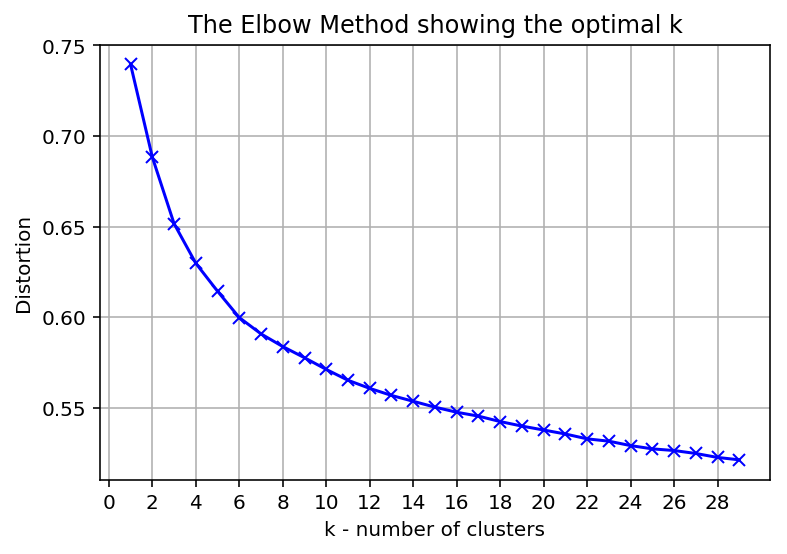

In [40]:
clu.k_elbow_plot(csvfile,True)

### 2) Non-normalized Data

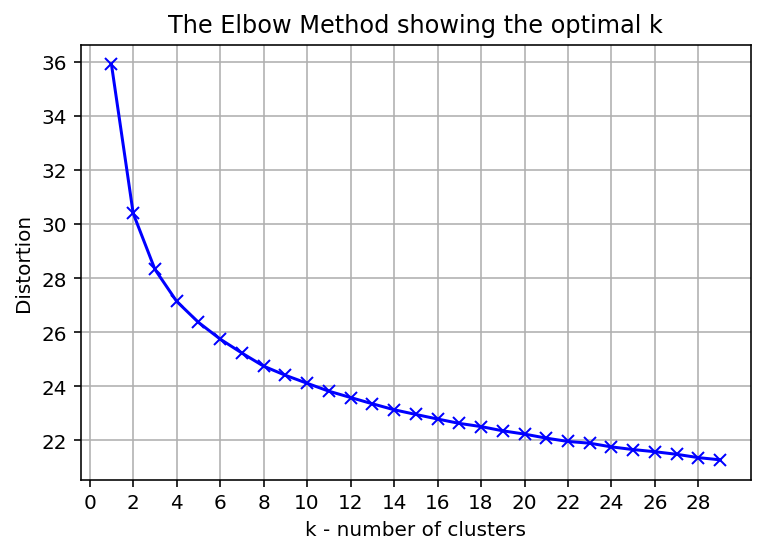

In [41]:
clu.k_elbow_plot(csvfile)

# Classification (win, loss or draw)

### Random Forest Classifier

In [42]:
from scipy import interp
import scipy.stats as scs
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, label_binarize


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support as PreRecF1Support_score
from sklearn.metrics import classification_report


from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

## train-test split = 0.2

In [50]:
%run soccer_model.py

Enter path to file that you wish to pre-process: (should be a .csv file) --> ../data/FootballEurope/FootballEurope.csv ../data/FootballEurope/FootballEurope.csv
Enter [yes or no] for whether to use home_away feature engineered dataframe: no
Enter train-test split testsize number between 0 and 1: 0.2

Soccer model accuracy: 72.37%

Confusion Matrix Normalized:
 [[80.7 17.   3.5]
 [17.5 36.2 23.3]
 [ 7.9 14.9 86.6]]

      Confusion Matrix:
Predicted   -1   0    1  All
True                        
-1          92  16    6  114
0           20  34   40   94
1            9  14  149  172
All        121  64  195  380

Top 10 most important features: 
[('awayRatingsFT', 0.16170489608372562), ('awayShotsOnTargetFT', 0.035300410691295483), ('awayPassSuccessFT', 0.023944703509631446), ('awayDribbleSuccessFT', 0.01837931874795889), ('homeAerialsTotalFT', 0.01774900477560533), ('homeFoulsCommitedFT', 0.015597598192131659), ('homePassesKeyFT', 0.01547107701135916), ('awayDispossessedFT', 0.0146756858

Accuracy of **72.4%** was achieved for Win/Loss/Draw classification

In [51]:
%run soccer_model.py

Enter path to file that you wish to pre-process: (should be a .csv file) --> ../data/FootballEurope/FootballEurope.csv ../data/FootballEurope/FootballEurope.csv
Enter [yes or no] for whether to use home_away feature engineered dataframe: yes
Enter train-test split testsize number between 0 and 1: 0.2

Soccer model accuracy: 98.68%

Confusion Matrix Normalized:
 [[ 98.3   2.7   0. ]
 [  1.4  97.3   0.3]
 [  0.    0.  100. ]]

      Confusion Matrix:
Predicted   -1    0    1  All
True                         
-1         281    5    0  286
0            4  183    1  188
1            0    0  286  286
All        285  188  287  760

Top 10 most important features: 
[('DefenceStrength', 0.30114339008025764), ('AttackStrength', 0.13923778018678112), ('AerialsTotalFT', 0.01721453217839417), ('DribbleStopRatio', 0.015463121425738614), ('DribbleSuccessFT', 0.014999211787577384), ('InterceptionsFT', 0.013616248814480226), ('DribblesAttemptedFT', 0.013346601149301328), ('DispossessedFT', 0.012590178

Accuracy of **98.7%** was achieved for Win/Loss/Draw classification using Home_Away feature engineered dataset

In [53]:
'''rfc2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=0.4, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
vim.fit(X_train, y_train, rfc2)
vim.score(X_test, y_test)'''
2==2

True

## train-test split = 0.5

In [54]:
%run soccer_model.py

Enter path to file that you wish to pre-process: (should be a .csv file) --> ../data/FootballEurope/FootballEurope.csv ../data/FootballEurope/FootballEurope.csv
Enter [yes or no] for whether to use home_away feature engineered dataframe: no
Enter train-test split testsize number between 0 and 1: 0.5

Soccer model accuracy: 69.47%

Confusion Matrix Normalized:
 [[77.1 18.6  4.9]
 [22.2 31.8 22.8]
 [ 6.7 19.1 85.1]]

      Confusion Matrix:
Predicted   -1    0    1  All
True                         
-1         219   44   21  284
0           63   75   98  236
1           19   45  366  430
All        301  164  485  950

Top 10 most important features: 
[('awayRatingsFT', 0.17347533387596342), ('awayShotsOnTargetFT', 0.03550821168298617), ('awayPassSuccessFT', 0.020524848926195518), ('awayDribbleSuccessFT', 0.018228123039728795), ('homePassesKeyFT', 0.01751193015538259), ('homeAerialsTotalFT', 0.016416331248072794), ('awayDispossessedFT', 0.01560812082482931), ('awayDribblesWonFT', 0.014093

Accuracy of **69.5%** was achieved for Win/Loss/Draw classification

In [56]:
%run soccer_model.py

Enter path to file that you wish to pre-process: (should be a .csv file) --> ../data/FootballEurope/FootballEurope.csv ../data/FootballEurope/FootballEurope.csv
Enter [yes or no] for whether to use home_away feature engineered dataframe: yes
Enter train-test split testsize number between 0 and 1: 0.5

Soccer model accuracy: 98.68%

Confusion Matrix Normalized:
 [[ 98.2   1.3   1. ]
 [  0.4  97.5   1.3]
 [  0.    0.  100. ]]

      Confusion Matrix:
Predicted   -1    0    1   All
True                          
-1         702    6    7   715
0            3  459    9   471
1            0    0  714   714
All        705  465  730  1900

Top 10 most important features: 
[('DefenceStrength', 0.27416858363787283), ('AttackStrength', 0.13117143495831138), ('DribbleStopRatio', 0.019665463684526093), ('AerialsTotalFT', 0.018109592536644535), ('DribbleSuccessFT', 0.017883550515352474), ('InterceptionsFT', 0.015970894230334723), ('DribblesAttemptedFT', 0.01575650005151661), ('DispossessedFT', 0.014

Accuracy of **98.7%** was achieved for Win/Loss/Draw classification

### XGBoost Classifier

In [47]:
from xgboost import XGBClassifier

In [72]:
model = soccer_model.SoccerModel('../data/FootballEurope/FootballEurope.csv', 'yes')
testsize = 0.5
X, y, df = model.get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                test_size=testsize, random_state=123, stratify=y)

#model_xg = XGBRegressor(n_estimators=10000, max_depth=5, learning_rate=0.01, n_jobs=-1, reg_lambda=0.5, reg_alpha=0, colsample_bytree=0.5, subsample=0.5, random_state=123)
xgbc = XGBClassifier(n_estimators=1000, subsample=1,random_state=123, n_jobs=-1)
model.fit(X_train, y_train, xgbc)
y_pred = model.predict(X_test)
print()
print('Soccer model accuracy: {0:0.2f}%'.format(100*model.score(X_test, y_test)))
C = confusion_matrix(y_test, y_pred)
Cnorm = np.around((100 * C / C.astype(np.float).sum(axis=1)), decimals=1)
# print('Confusion Matrix:\n {}'.format(C))
print()
print('Confusion Matrix Normalized:\n {}'.format(Cnorm))
print()
print('      Confusion Matrix:')
print(pd.crosstab(y_test, y_pred, rownames=['True'],
        colnames=['Predicted'], margins=True))
print()
print('Top 10 most important features: ')
print(model._top10_features(df))


Soccer model accuracy: 99.79%

Confusion Matrix Normalized:
 [[ 99.7   0.    0.3]
 [  0.   99.6   0.3]
 [  0.    0.  100. ]]

      Confusion Matrix:
Predicted   -1    0    1   All
True                          
-1         713    0    2   715
0            0  469    2   471
1            0    0  714   714
All        713  469  718  1900

Top 10 most important features: 
[('AttackStrength', 0.2871235), ('DefenceStrength', 0.2744969), ('AerialsTotalFT', 0.030645797), ('DribbleSuccessFT', 0.03051427), ('DribblesAttemptedFT', 0.022359595), ('DribbleStopRatio', 0.02170196), ('DispossessedFT', 0.01630935), ('InterceptionsFT', 0.014994081), ('FoulsCommitedFT', 0.009469946), ('FormationCode', 0.0040773377)]


Accuracy of **99.8%** was achieved for Win/Loss/Draw classification

In [69]:
len(df.columns), df.columns

(21,
 Index(['AerialsTotalFT', 'AttackStrength', 'DefenceStrength', 'DispossessedFT',
        'DribbleStopRatio', 'DribbleSuccessFT', 'DribblesAttemptedFT',
        'FormationCode', 'FoulsCommitedFT', 'InterceptionsFT',
        'OffsidesCaughtFT', 'PassSuccessFT', 'PassesKeyFT', 'PossessionFT',
        'RatingsFT', 'SOTpercent', 'ShotsBlockedpercent', 'TackleSuccessFT',
        'Team', 'game_id', 'at_home'],
       dtype='object'))

## Observations

### "BIG" Team dominancy and consistency

Enter path to file for plotting: (should be a .csv file)-->../data/FootballEurope/FootballEurope.csv ../data/FootballEurope/FootballEurope.csv


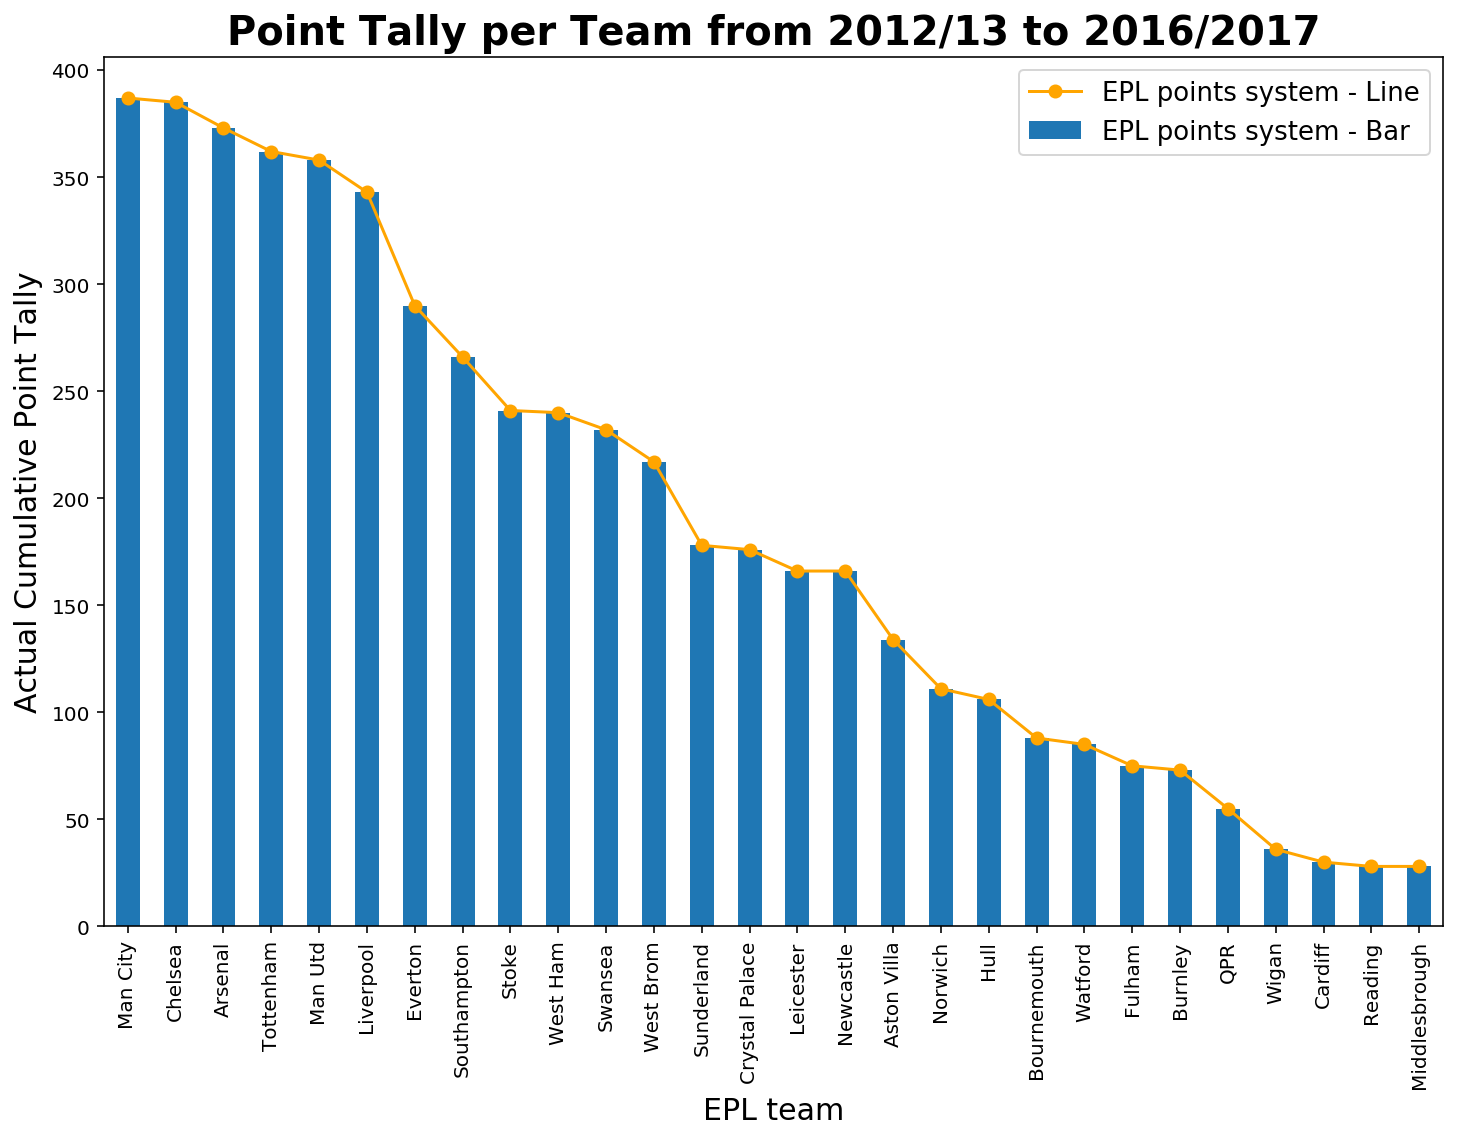

<Figure size 432x288 with 0 Axes>

In [62]:
%run league_table.py

### Home Field Advantage, "BIG" team effect

Enter path to file for plotting: (should be a .csv file) -->../data/FootballEurope/FootballEurope.csv ../data/FootballEurope/FootballEurope.csv


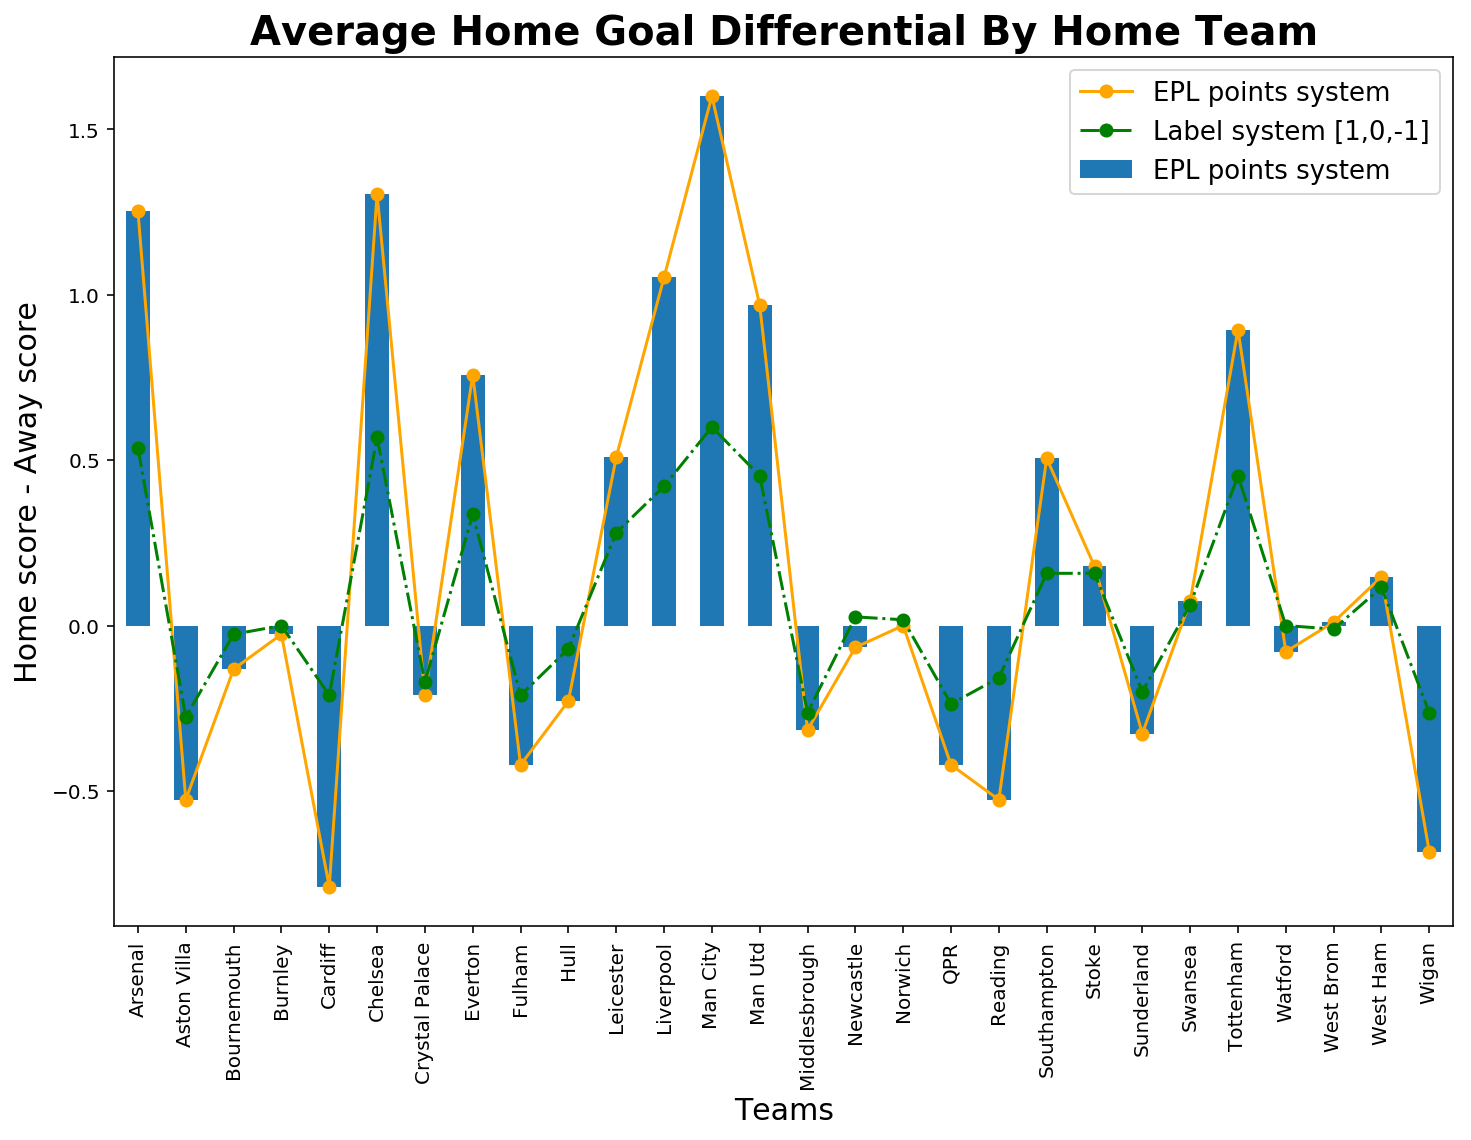

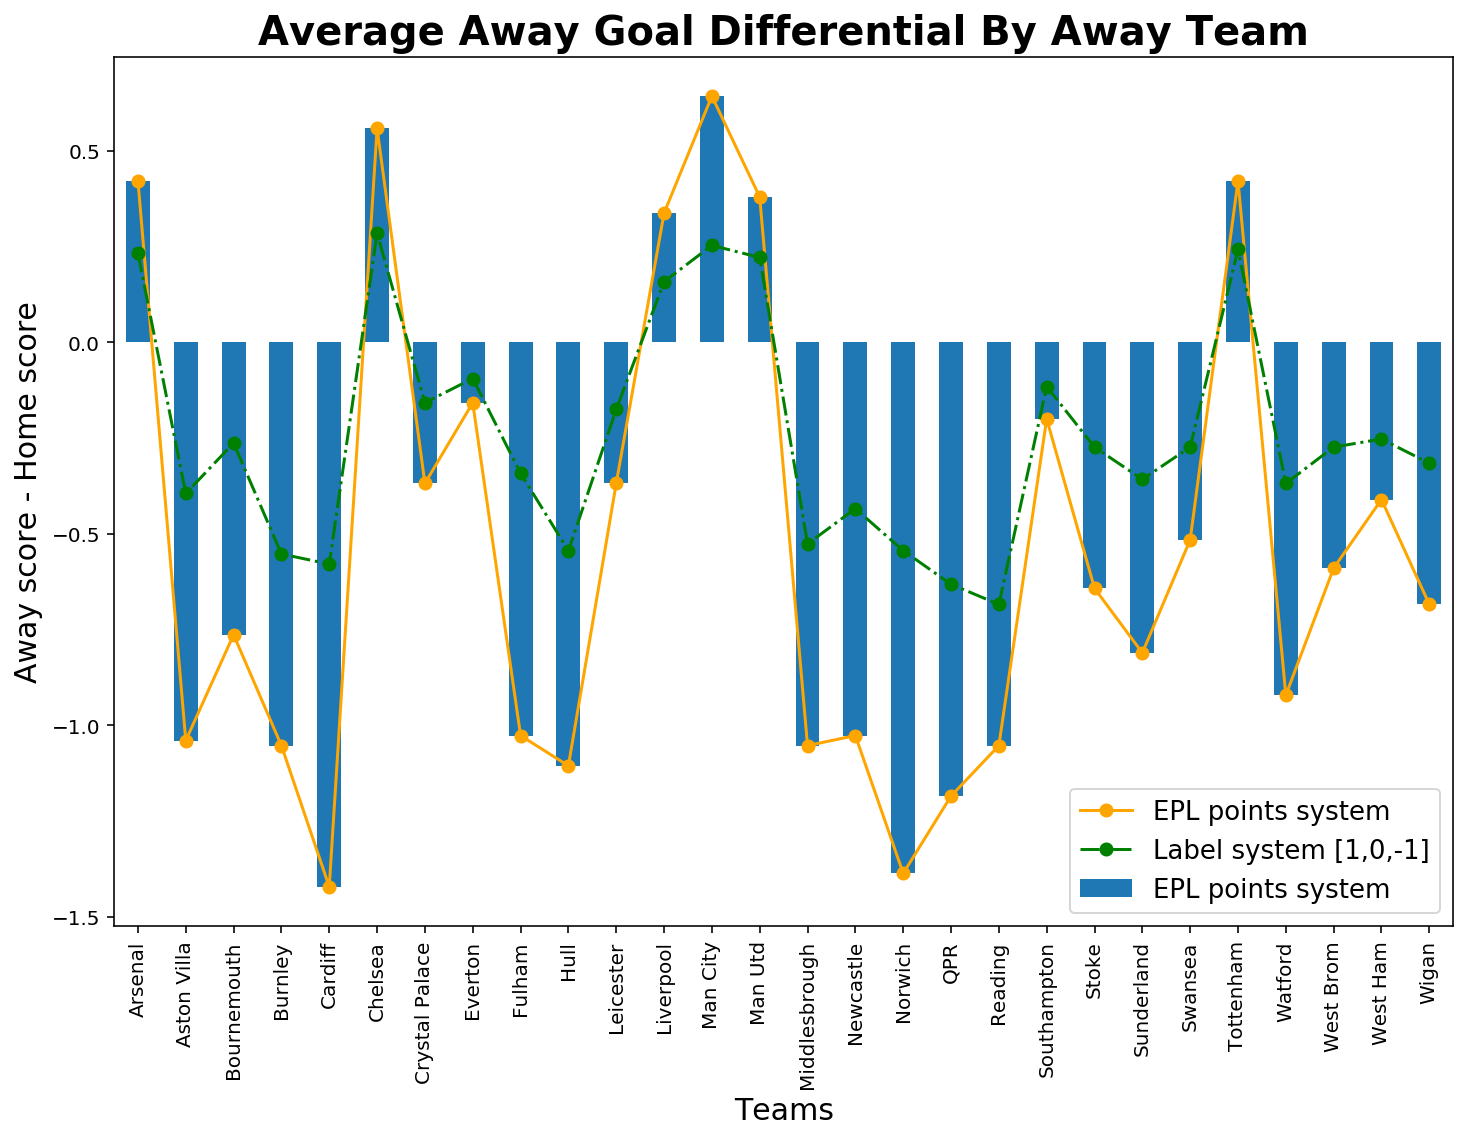

<Figure size 432x288 with 0 Axes>

In [63]:
%run Team_Dominancy.py